In [7]:
%matplotlib inline
from collections import defaultdict
import matplotlib.pyplot as plt
import numpy as np
import os
import pickle
prefix_dir = '/home/smgutstein/Projects/SG_Projects/opt-tfer/results/opt_tfer_expts/'
expt_dir = 'cifar_100_living_notliving_expts/wide_resnet_28_10_arch/tfer_nets'
spc_dir = 'spc_10'
root_dir = os.path.join(prefix_dir, expt_dir, spc_dir)


In [9]:
data_dirs = sorted([os.path.join(root_dir, x) for x in os.listdir(root_dir) if x[-1]=='0' or x[-1]=='t'])

In [19]:
data_dict = defaultdict(list)
for curr_src in data_dirs:
    curr_key = os.path.basename(curr_src).split('_')[-1]
    expt_dirs = os.listdir(curr_src)
    for curr_expt in expt_dirs:
        tr_dirs = os.listdir(os.path.join(curr_src, curr_expt))
        for curr_tr in tr_dirs:
            v_dirs = os.listdir(os.path.join( curr_src, curr_expt, curr_tr))[0]
            fpath = os.path.join(curr_src, curr_expt, curr_tr, v_dirs, 'metadata')
            with open(os.path.join(fpath,'Expt_output.log')) as f:
                fl = f.readlines()
                #print (fl[-1].split(":")[-1].split('%')[0].strip())
                try:
                    acc = float(fl[-1].split(":")[-1].split('%')[0].strip())
                    data_dict[curr_key].append(acc)
                except:
                    import pdb
                    pdb.set_trace()
                    data_dict[curr_src].append(acc)
 
    

In [20]:
data_dict

defaultdict(list,
            {'0': [20.94,
              21.66,
              21.11,
              21.17,
              23.74,
              23.69,
              21.29,
              22.83,
              23.14],
             '10': [42.97,
              43.43,
              42.6,
              43.66,
              43.86,
              42.51,
              43.2,
              43.34,
              43.34],
             '100': [47.17,
              49.14,
              47.37,
              47.11,
              48.46,
              47.91,
              46.57,
              48.26,
              46.57],
             '110': [46.63,
              47.57,
              46.4,
              46.91,
              47.69,
              46.57,
              47.46,
              47.86,
              46.74],
             '120': [47.63,
              47.6,
              46.8,
              46.0,
              47.8,
              46.31,
              47.66,
              48.71,
              47.17],
       

In [13]:
stats_dict = dict()
for x in data_dict:
    data = sorted(data_dict[x])
    stats = {'min':np.min(data), 'median': np.median(data), 'max':np.max(data)}
    if x == 'best':
        ep = 187
    else:
        ep = int(x)                                                                 
    stats_dict[ep] = stats
    

In [14]:
for x in sorted(stats_dict):
    print(x, stats_dict[x])

0 {'min': 20.94, 'median': 21.66, 'max': 23.74}
10 {'min': 42.51, 'median': 43.34, 'max': 43.86}
20 {'min': 44.6, 'median': 45.43, 'max': 46.77}
30 {'min': 44.43, 'median': 46.66, 'max': 47.31}
40 {'min': 45.31, 'median': 46.26, 'max': 48.51}
50 {'min': 45.43, 'median': 46.69, 'max': 47.8}
60 {'min': 45.23, 'median': 46.4, 'max': 48.0}
70 {'min': 46.54, 'median': 47.66, 'max': 48.89}
80 {'min': 46.34, 'median': 47.51, 'max': 48.91}
90 {'min': 45.57, 'median': 47.06, 'max': 49.2}
100 {'min': 46.57, 'median': 47.37, 'max': 49.14}
110 {'min': 46.4, 'median': 46.91, 'max': 47.86}
120 {'min': 46.0, 'median': 47.6, 'max': 48.71}
130 {'min': 44.43, 'median': 47.6, 'max': 48.94}
140 {'min': 43.77, 'median': 46.97, 'max': 47.97}
150 {'min': 40.89, 'median': 41.74, 'max': 47.46}
160 {'min': 39.6, 'median': 40.89, 'max': 44.23}
170 {'min': 40.89, 'median': 43.03, 'max': 44.94}
180 {'min': 37.49, 'median': 41.66, 'max': 42.91}
187 {'min': 32.71, 'median': 41.34, 'max': 43.63}
190 {'min': 38.71, 'm

In [15]:
src_net_stats = pickle.load(open('src_net_stats.pkl','rb'))
src_net_stats

{0: 0.0156,
 1: 0.1389,
 2: 0.2219,
 3: 0.2911,
 4: 0.3642,
 5: 0.4229,
 6: 0.4474,
 7: 0.4879,
 8: 0.5078,
 9: 0.5304,
 10: 0.5287,
 11: 0.5513,
 12: 0.5435,
 13: 0.568,
 14: 0.5642,
 15: 0.5777,
 16: 0.5738,
 17: 0.5687,
 18: 0.5739,
 19: 0.5835,
 20: 0.5954,
 21: 0.5863,
 22: 0.5873,
 23: 0.5995,
 24: 0.6026,
 25: 0.6034,
 26: 0.5918,
 27: 0.603,
 28: 0.6048,
 29: 0.5968,
 30: 0.6086,
 31: 0.6108,
 32: 0.6179,
 33: 0.6132,
 34: 0.6048,
 35: 0.6031,
 36: 0.602,
 37: 0.6048,
 38: 0.607,
 39: 0.6158,
 40: 0.6069,
 41: 0.6122,
 42: 0.6088,
 43: 0.6152,
 44: 0.6099,
 45: 0.6149,
 46: 0.616,
 47: 0.6053,
 48: 0.6205,
 49: 0.6166,
 50: 0.6226,
 51: 0.6204,
 52: 0.6153,
 53: 0.6193,
 54: 0.6259,
 55: 0.6237,
 56: 0.6171,
 57: 0.6246,
 58: 0.6309,
 59: 0.6197,
 60: 0.6144,
 61: 0.7219,
 62: 0.7283,
 63: 0.7282,
 64: 0.7244,
 65: 0.7257,
 66: 0.7255,
 67: 0.7227,
 68: 0.7114,
 69: 0.7095,
 70: 0.7109,
 71: 0.7059,
 72: 0.7028,
 73: 0.7037,
 74: 0.7001,
 75: 0.7059,
 76: 0.7057,
 77: 0.6987,
 

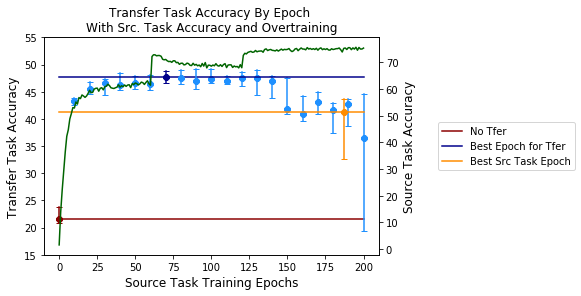

In [17]:
best_src=187
best_tfer = 70

fig, ax1 = plt.subplots(1, 1, sharex=True)
ax2=ax1.twinx()
src_x = []
src_y = []
for k,v in src_net_stats.items():
    src_x.append(k)
    src_y.append(100*v)
ax2.plot(src_x, src_y, color='darkgreen')
    
tfer_x = []
tfer_min = []
tfer_med = []
tfer_max = []
for k,v in stats_dict.items():
    tfer_x.append(k)
    tfer_min.append(v['min'])
    tfer_med.append(v['median'])
    tfer_max.append(v['max'])
    if k == 0:
        color = 'darkred'
        ax1.plot([0,200],[v['median'],v['median']],
              color = color, label= "No Tfer")
    elif k == best_src:
        color = 'darkorange'
        ax1.plot([0,200],[v['median'],v['median']],
              color = color, label= "Best Src Task Epoch")
    elif k == best_tfer:
        color = 'darkblue'
        ax1.plot([0,200],[v['median'],v['median']],
              color = color, label="Best Epoch for Tfer")

    else:
        color = 'dodgerblue'
        
    ax1.plot([k, k],[v['min'], v['max']],
              color = color)
    ax1.plot([k],[v['max']],marker='_',
              color = color)
    ax1.plot([k],[v['median']],marker='8',
              color = color)
    ax1.plot([k],[v['min']],marker='_',
              color = color)
    ax1.set_ylim([15,55])
    
    ax1.set_xlabel('Source Task Training Epochs', fontsize=12)
    ax1.set_ylabel('Transfer Task Accuracy', fontsize=12)
    ax1.legend(loc='center right', bbox_to_anchor=(1.6,0.5))
    ax2.set_ylabel('Source Task Accuracy', fontsize=12)
    plt.title('Transfer Task Accuracy By Epoch \nWith Src. Task Accuracy and Overtraining')
    #plt.savefig("WideResnet_Prelim_Results.png")